## Analysis of Samsung Health Step Data

This notebook is a quick analysis of my daily steps over the last two years as recorded by the Samsung Health app on my Android phone

If you want to do the same, this file is obtained from the Samsung Health App  
Go to Options (top right) -> Settings -> Download Personal Data -> Download  
You should see a file in the folder downloaded that looks like: 'com.samsung.shealth.step_daily_trend.YYYYMMDDHHMM.csv'  
There's lots other stuff in there, depending which features of the app you use.


First let's import the things we'll be needing:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #Gets rid of the seaborn 'FutureWarning'
import cufflinks as cf

## Importing and Cleaning the Data

Table starts on 2nd row so use header=1

In [2]:
steps = pd.read_csv('data/com.samsung.shealth.step_daily_trend.201812071026.csv', header=1 ) 
steps.head()

,source_pkg_name,binning_data,count,calorie,deviceuuid,update_time,source_type,day_time,speed,pkg_name,distance,datauuid,create_time
0,com.sec.android.app.shealth,00136c11-c381-4021-af1b-e7f2bd82ddf0.binning_d...,13218,557.81000,VfS0qUERdZ,2018-04-25 15:30:54.081,-2,1496016000000,1.588903,com.sec.android.app.shealth,10332.351,00136c11-c381-4021-af1b-e7f2bd82ddf0,2018-04-25 15:30:54.081
1,com.sec.android.app.shealth,00335ce7-7cfc-49da-b303-b90e4cac3723.binning_d...,8050,385.28998,T6rJlOV0ZG,2018-04-25 15:30:53.959,0,1498694400000,4.984097,com.sec.android.app.shealth,6747.390,00335ce7-7cfc-49da-b303-b90e4cac3723,2018-04-25 15:30:53.959
2,com.sec.android.app.shealth,004f0821-d204-4717-a9ee-949e94cc0133.binning_d...,2927,166.59000,T6rJlOV0ZG,2018-04-25 15:30:53.970,0,1501459200000,3.000000,com.sec.android.app.shealth,2583.480,004f0821-d204-4717-a9ee-949e94cc0133,2018-04-25 15:30:53.970
3,com.sec.android.app.shealth,005464c9-264b-47dc-afd7-f7df74755374.binning_d...,13124,749.80000,T6rJlOV0ZG,2018-04-25 15:30:53.992,0,1508630400000,5.083334,com.sec.android.app.shealth,11260.740,005464c9-264b-47dc-afd7-f7df74755374,2018-04-25 15:30:53.992
4,com.sec.android.app.shealth,00819650-c328-4f55-9779-c46c2892fb12.binning_d...,11816,510.00000,T6rJlOV0ZG,2018-04-25 15:30:53.903,0,1478217600000,3.750000,com.sec.android.app.shealth,9240.410,00819650-c328-4f55-9779-c46c2892fb12,2018-04-25 15:30:53.903


The 'day_time' format looks like unix time (milliseconds since Epoch)  
Let's convert it to something more useable

In [3]:
steps['day_time'] = pd.to_datetime(steps['day_time'], unit='ms')
steps.head()

,source_pkg_name,binning_data,count,calorie,deviceuuid,update_time,source_type,day_time,speed,pkg_name,distance,datauuid,create_time
0,com.sec.android.app.shealth,00136c11-c381-4021-af1b-e7f2bd82ddf0.binning_d...,13218,557.81000,VfS0qUERdZ,2018-04-25 15:30:54.081,-2,2017-05-29,1.588903,com.sec.android.app.shealth,10332.351,00136c11-c381-4021-af1b-e7f2bd82ddf0,2018-04-25 15:30:54.081
1,com.sec.android.app.shealth,00335ce7-7cfc-49da-b303-b90e4cac3723.binning_d...,8050,385.28998,T6rJlOV0ZG,2018-04-25 15:30:53.959,0,2017-06-29,4.984097,com.sec.android.app.shealth,6747.390,00335ce7-7cfc-49da-b303-b90e4cac3723,2018-04-25 15:30:53.959
2,com.sec.android.app.shealth,004f0821-d204-4717-a9ee-949e94cc0133.binning_d...,2927,166.59000,T6rJlOV0ZG,2018-04-25 15:30:53.970,0,2017-07-31,3.000000,com.sec.android.app.shealth,2583.480,004f0821-d204-4717-a9ee-949e94cc0133,2018-04-25 15:30:53.970
3,com.sec.android.app.shealth,005464c9-264b-47dc-afd7-f7df74755374.binning_d...,13124,749.80000,T6rJlOV0ZG,2018-04-25 15:30:53.992,0,2017-10-22,5.083334,com.sec.android.app.shealth,11260.740,005464c9-264b-47dc-afd7-f7df74755374,2018-04-25 15:30:53.992
4,com.sec.android.app.shealth,00819650-c328-4f55-9779-c46c2892fb12.binning_d...,11816,510.00000,T6rJlOV0ZG,2018-04-25 15:30:53.903,0,2016-11-04,3.750000,com.sec.android.app.shealth,9240.410,00819650-c328-4f55-9779-c46c2892fb12,2018-04-25 15:30:53.903


There seems to be a duplicate for each entry,with source_type = -2 or -0.  
Let's get just the 0s.  
There's also more than one log per day, so let's sum those  
Then let's drop the source_type, speed and calories

In [4]:
steps = steps[steps['source_type']==0].groupby('day_time').sum()
steps.drop(['source_type','speed', 'calorie'], axis=1, inplace=True)
steps.reset_index(inplace=True)
steps.head()

,day_time,count,distance
0,2016-10-08,6148,4902.15
1,2016-10-09,4764,3655.46
2,2016-10-10,6286,4972.56
3,2016-10-11,7180,5608.64
4,2016-10-12,7581,5936.78


We can create new columns for month,date,year extracted from the time stamp

In [5]:
steps['Day'] = steps['day_time'].apply(lambda datestamp: datestamp.day)
steps['Year'] = steps['day_time'].apply(lambda datestamp: datestamp.year)


#Functions to get days of the week and months as strings instead of indexes 
#(0-6 and 0-12 respectively)

def dayofweek(datestamp):
    return ['Mon', 'Tue', 'Wed','Thur','Fri','Sat','Sun'][datestamp.weekday()]
def monthname(datestamp):
    return ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'][datestamp.month-1]

steps['Weekday'] = steps['day_time'].apply(lambda datestamp: dayofweek(datestamp)) 
steps['MonthName'] = steps['day_time'].apply(lambda datestamp: monthname(datestamp))

#Keeping the month as an index to construct the yearmonth column below:

steps['Month'] = steps['day_time'].apply(lambda datestamp: datestamp.month)

#Function to get a combined 'YearMonth' column

def yearmonth(cols):
    month=cols[0]
    year=cols[1]
    return '{}-{}'.format(month, year)

steps['YearMonth'] = steps[['Month', 'Year']].apply(lambda cols: yearmonth(cols), axis=1)

steps.head()

,day_time,count,distance,Day,Year,Weekday,MonthName,Month,YearMonth
0,2016-10-08,6148,4902.15,8,2016,Sat,Oct,10,10-2016
1,2016-10-09,4764,3655.46,9,2016,Sun,Oct,10,10-2016
2,2016-10-10,6286,4972.56,10,2016,Mon,Oct,10,10-2016
3,2016-10-11,7180,5608.64,11,2016,Tue,Oct,10,10-2016
4,2016-10-12,7581,5936.78,12,2016,Wed,Oct,10,10-2016


Now we can get rid of the day_time column since we have extracted all the information into other columns.  
Our final DataFrame looks like :

In [6]:
steps.drop('day_time', inplace=True, axis=1)

steps.head()

,count,distance,Day,Year,Weekday,MonthName,Month,YearMonth
0,6148,4902.15,8,2016,Sat,Oct,10,10-2016
1,4764,3655.46,9,2016,Sun,Oct,10,10-2016
2,6286,4972.56,10,2016,Mon,Oct,10,10-2016
3,7180,5608.64,11,2016,Tue,Oct,10,10-2016
4,7581,5936.78,12,2016,Wed,Oct,10,10-2016


## Analysis and Visualization

Let's investigate the data:  
  
Firstly, how many years' worth of data do we have?

In [7]:
print ('Number of years = {}'.format(steps['count'].count()/365))

Number of years = 2.1397260273972605


Just over 2 year's of data  
What does the distribution of the data look like?

In [8]:
steps['count'].describe()

count      781.000000
mean      8810.828425
std       5587.723107
min         12.000000
25%       4910.000000
50%       7761.000000
75%      11418.000000
max      38652.000000
Name: count, dtype: float64

So my all time average is 8810 steps, with a standard deviation of 5587.  
On half of all days I walked more than 7761 steps.  

My record was 38652 steps in one day.   
If I recall correctly, I was hiking in Peru!  

When was that again? :  

In [9]:
steps[steps['count']==steps['count'].max()][['Day','MonthName', 'Year']]

,Day,MonthName,Year
277,13,Jul,2017


A look at the distribution of the number of daily steps

[(0, 38652)]

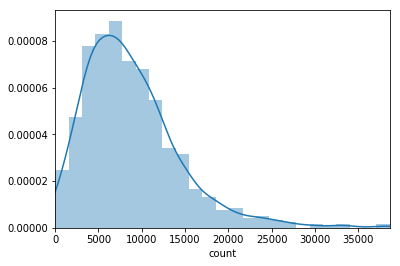

In [10]:
sns.distplot(steps['count'], bins=25).set(xlim=(0,steps['count'].max()))  

Was I more active in 2017 or 2018?

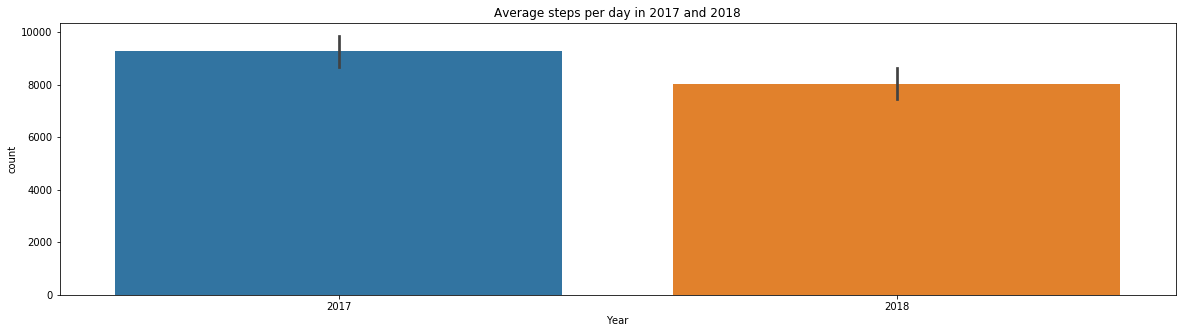

In [11]:
plt.figure(figsize=(20,5))
plt.tight_layout()
plt.title('Average steps per day in 2017 and 2018')
sns.barplot(x='Year', y=steps['count'], data=steps[steps['Year']>2016])

2017 wins!  
Let's break that down by month. 

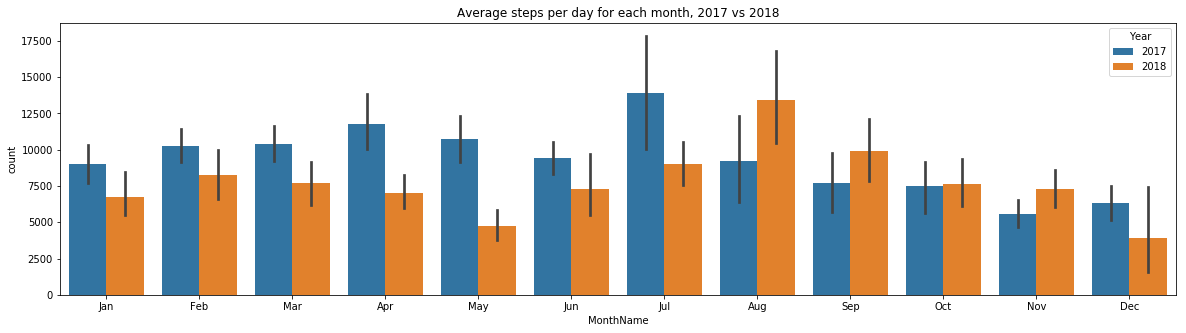

In [12]:
plt.figure(figsize=(20,5))
plt.tight_layout()
plt.title('Average steps per day for each month, 2017 vs 2018')
sns.barplot(x='MonthName', y='count', data=steps[steps['Year']>2016], hue='Year', order = ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] )

Looks like i'm often walking a lot while on holiday!  
And I went on holiday in July in 2017 vs August in 2018  

Am I more active at the start or the end of a typical month? (Average over years)

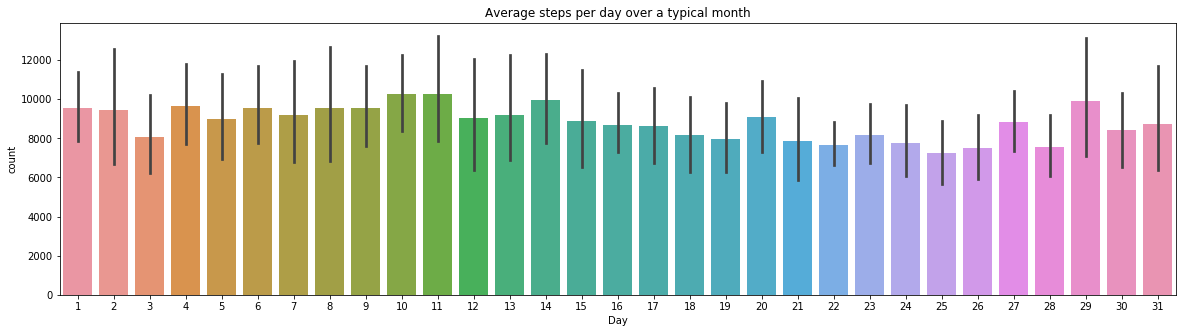

In [13]:
plt.figure(figsize=(20,5))
plt.tight_layout()
plt.title('Average steps per day over a typical month')
sns.barplot(x='Day', y='count', data=steps)

Doesn't seem to be a factor.  

What about activity through a typical week?  

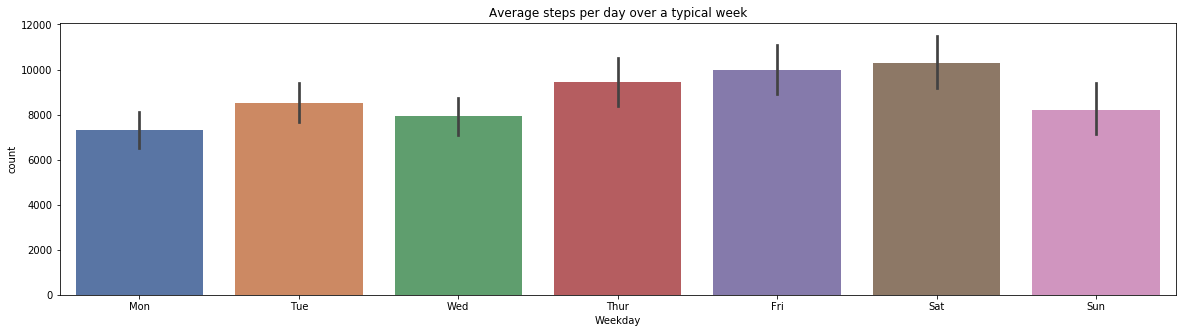

In [14]:
plt.figure(figsize=(20,5))
plt.tight_layout()
plt.title('Average steps per day over a typical week')
sns.barplot(x='Weekday', y='count', data=steps, order = ['Mon', 'Tue', 'Wed','Thur','Fri','Sat','Sun'], palette = 'deep')

Momentum building towards the weekend with a lazy Sunday!  

Let's look at the year 2017 in detail:

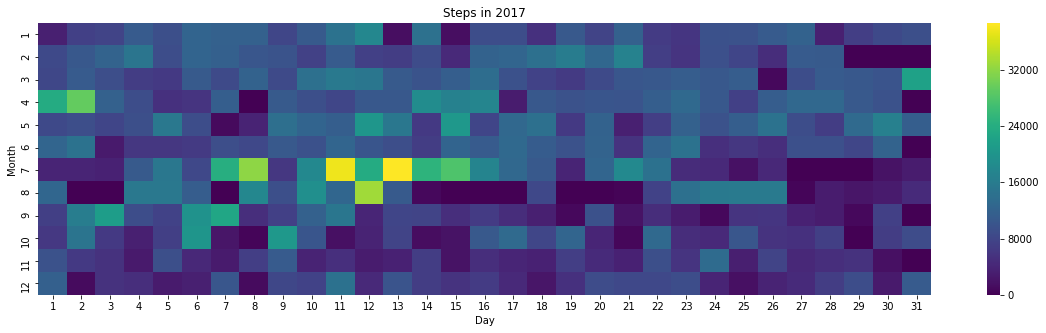

In [15]:
piv = steps[steps['Year']==2017].pivot_table(index='Month',columns='Day', values='count').fillna(0)
plt.figure(figsize=(20,5))
plt.title('Steps in 2017')
sns.heatmap(piv, cmap='viridis')

If you look closely you can spot the holiday periods and weekends.  

What about the total distance walked and total steps per year?

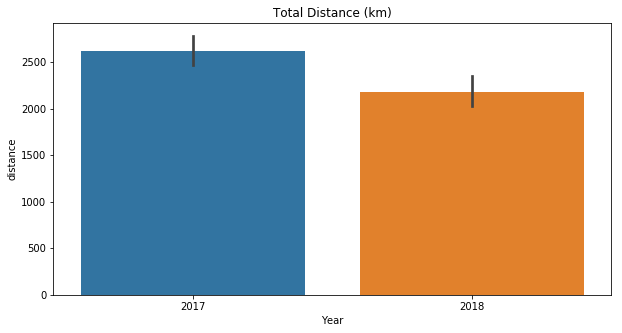

In [16]:
plt.figure(figsize=(10,5))
plt.title('Total Distance (km)')
sns.barplot(x='Year', y=steps['distance']/1000, data=steps[steps['Year']>2016], estimator= sum)

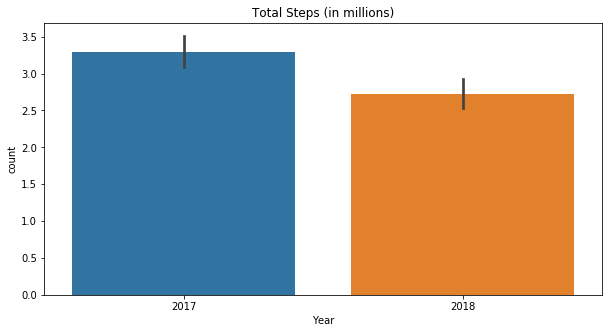

In [17]:
plt.figure(figsize=(10,5))
plt.title('Total Steps (in millions)')
sns.barplot(x='Year', y=steps['count']/1000000, data=steps[steps['Year']>2016], estimator= sum)

Speaking of distance walked, how far exactly is 1 step?

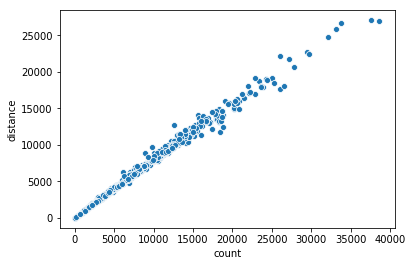

In [18]:
sns.scatterplot(x='count', y='distance', data=steps)

Let's get the correlation coefficient (i.e. the distance per step : step-size)

In [19]:
from sklearn.linear_model import LinearRegression  #For step size regression fit

lm= LinearRegression()
x=steps['count'].values.reshape(-1, 1)
y=steps['distance'].values.reshape(-1, 1)
lm.fit(x,y)
print('Average step size = {:.2f} cm'.format(lm.coef_[0][0]*100))

Average step size = 76.42 cm


How does this compare to a simple average, taken as total distance / total steps?  

In [20]:
total_distance = steps['distance'].sum()
total_steps =  steps['count'].sum()
average_step = total_distance/total_steps
print('Average step size = {:.2f} cm'.format(average_step))

Average step size = 0.80 cm


This is different to the value as calculated via regression. Not totally sure why...  

Let's investigate "lazy days" when my steps are less than some threshold

In [21]:
thresh=1000
lazydays= steps[steps['count']<thresh]['count'].count()
print('{} days where steps < {}'.format(lazydays,thresh))

19 days where steps < 1000


We could make a cumulative steps function which returns the number of days with at least 'n' steps  
e.g. My phone has a 'target reached!' notification when I go through 10,000 steps  
which I have received at_least(10000) times :

In [23]:
def at_least(n):
    return sum(steps['count']>n)

print (at_least(10000))

269


Let's plot that function for every value of steps recorded (laziest day to busiest day)

Laziest day = 12
Busiest day = 38652


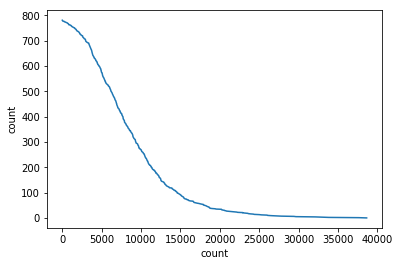

In [24]:
print('Laziest day = {}'.format(steps['count'].min()))
print('Busiest day = {}'.format(steps['count'].max()))
sns.lineplot(x= steps['count'], y= steps['count'].apply(lambda values : at_least(values)))


Thanks for taking a look!